In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# providing the dataset path
data1 = "C:/Users/Nael/Desktop/Uganda/Uganda Uthabiti_baseline/ML/baseline_dataset.csv"
# reading the csv file and named as df
df = pd.read_csv(data1, encoding='latin-1')    

In [3]:
# checking  and # getting all the column names of the dataframe
columns_names = list(df.columns)
# print(columns_names)    # for printing the column name, remove # from this code line      

# I. Variables/columns creation 


##  1) Household size 

In [4]:
df["hh_size"] = df['m total'] + df['f total']

 ## 2)  Gendered household type

In [5]:
df['num_male_adult'] = df['m 18-29 years'] + df['m 30-59 years'] + df['m 60 years and above'] 
df['num_female_adult'] = df['f 18-29 years'] + df['f 30-59 years'] + df['f 60 years and above']
df['num_children'] = df['m 0-17 years'] + df['f 0-17 years']

In [6]:
# creation of a "boolean"  columne for each gendered household type 
df['FM_gender'] = df.apply(lambda row: 1 if (row['num_male_adult'] >= 1 and row['num_female_adult'] >= 1) else 0, axis=1)
df['FNM_gender'] =df.apply(lambda row: 1 if (row['num_male_adult'] == 0 and row['num_female_adult'] >= 1) else 0, axis=1)
df['MNF_gender'] = df.apply(lambda row: 1 if (row['num_male_adult'] >= 1 and row['num_female_adult'] == 0) else 0, axis=1)
df['CNA_gender'] = df.apply(lambda row: 1 if (row['num_male_adult'] == 0 and row['num_female_adult'] == 0) else 0, axis=1)

In [7]:
# Count of number of Female & Male adult households
count_FM = df['FM_gender'].value_counts()[1]
print(count_FM)

548


In [8]:
# Count of number of Female No Male adult households
count_FNM = df['FNM_gender'].value_counts()[1]
print(count_FNM)

167


In [9]:
# Count of number of Male No Female adult households
count_MNF = df['MNF_gender'].value_counts()[1]
print(count_MNF)

60


In [10]:
#Count of number of Children No adult households
count_CNA = df['CNA_gender'].value_counts()[1]
print(count_CNA)

49


In [11]:
# Creation of single column for gendered household type 
df['gender_HH_type'] = np.where((df['FM_gender'] == 1) & (df['FNM_gender'] == 0) & (df['MNF_gender'] == 0) & (df['CNA_gender'] == 0), 'F&M',
                   np.where((df['FM_gender'] == 0) & (df['FNM_gender'] == 1) & (df['MNF_gender'] ==0) & (df['CNA_gender'] == 0), 'FNM',
                   np.where((df['FM_gender'] == 0) & (df['FNM_gender'] == 0) & (df['MNF_gender'] == 1) & (df['CNA_gender'] == 0), 'MNF', 'CNA')))

In [12]:
# Count of gendered household type
df['gender_HH_type'].value_counts()

F&M    548
FNM    167
MNF     60
CNA     49
Name: gender_HH_type, dtype: int64

## 3) Food Consumption Score

In [13]:
# checking the data type for Food group consumption columns 
df[['FC01','FC02','FC03','FC04','FC05','FC06','FC07','FC08','FC09']].dtypes

FC01    object
FC02    object
FC03    object
FC04    object
FC05    object
FC06    object
FC07    object
FC08    object
FC09    object
dtype: object

In [14]:
# checking the number of missing value for food group consumption columns 
FC_missing = df[['FC01','FC02','FC03','FC04','FC05','FC06','FC07','FC08','FC09']].isna().sum()
print (FC_missing)

FC01    0
FC02    0
FC03    0
FC04    0
FC05    0
FC06    0
FC07    0
FC08    0
FC09    0
dtype: int64


In [15]:
# viewing  the different values in FCO1 and so on
print (df['FC01'].unique())
print (df['FC02'].unique())

['2 days' '7 days' '3 days' '4 days' '1 day' '6 days' '5 days' '0 day']
['3 days' '6 days' '0 day' '7 days' '5 days' '4 days' '2 days' '1 day']


In [16]:
# creating/renaming food group consumption column and keeping the first value characters (ex: 2 days to 2)
df['FC01_staple'] = df['FC01'].str.slice(stop=1)
df['FC02_Pulse']  = df['FC02'].str.slice(stop=1)
df['FC03_Vegetable'] = df['FC03'].str.slice(stop=1)
df['FC04_Fruits'] = df['FC04'].str.slice(stop=1)
df['FC05_Meat_Fish'] = df['FC05'].str.slice(stop=1)
df['FC06_Milk'] = df['FC06'].str.slice(stop=1)
df['FC07_Sugar'] = df['FC07'].str.slice(stop=1)
df['FC08_Oil'] = df['FC08'].str.slice(stop=1)
df['FC09_Condiment'] = df['FC09'].str.slice(stop=1)

In [17]:
# Transforming columns as integer data type
df['FC01_staple'] = pd.to_numeric(df['FC01_staple'], errors='coerce').astype(int)
df['FC02_Pulse'] = pd.to_numeric(df['FC02_Pulse'], errors='coerce').astype(int)
df['FC03_Vegetable'] = pd.to_numeric(df['FC03_Vegetable'], errors='coerce').astype(int)
df['FC04_Fruits'] = pd.to_numeric(df['FC04_Fruits'], errors='coerce').astype(int)
df['FC05_Meat_Fish'] = pd.to_numeric(df['FC05_Meat_Fish'], errors='coerce').astype(int)
df['FC06_Milk'] = pd.to_numeric(df['FC06_Milk'], errors='coerce').astype(int)
df['FC07_Sugar'] = pd.to_numeric(df['FC07_Sugar'], errors='coerce').astype(int)
df['FC08_Oil'] = pd.to_numeric(df['FC08_Oil'], errors='coerce').astype(int)
df['FC09_Condiment'] = pd.to_numeric(df['FC09_Condiment'], errors='coerce').astype(int)

In [18]:
# Creating food group weighted colums
df['FC01_staple_W'] = df['FC01_staple']*2
df['FC02_Pulse_W']  = df['FC02_Pulse']*3
df['FC03_Vegetable_1'] = df['FC03_Vegetable']*1
df['FC04_Fruits_W'] = df['FC04_Fruits']*1
df['FC05_Meat_Fish_W'] = df['FC05_Meat_Fish']*4
df['FC06_Milk_W'] = df['FC06_Milk']*4
df['FC07_Sugar_W'] = df['FC07_Sugar']*0.5
df['FC08_Oil_W'] = df['FC08_Oil']*0.5
df['FC09_Condiment_W'] = df['FC09_Condiment']*0

In [19]:
# computing the food consumption score
df['FCS'] = df['FC01_staple_W']+df['FC02_Pulse_W']+df['FC03_Vegetable_1']+df['FC04_Fruits_W']+df['FC05_Meat_Fish_W']+df['FC06_Milk_W']+df['FC07_Sugar_W']+df['FC08_Oil_W']+df['FC09_Condiment_W']

## 4) Reduced Coping Strategy index

In [20]:
# checking the data type for coping strategy columns 
df[['CS01','CS02','CS03','CS04','CS05']].dtypes

CS01    object
CS02    object
CS03    object
CS04    object
CS05    object
dtype: object

In [21]:
# checking the number of missing value for food group consumption columns 
CS_missing = df[['CS01','CS02','CS03','CS04','CS05']].isna().sum()
print (CS_missing)

CS01    0
CS02    0
CS03    0
CS04    0
CS05    0
dtype: int64


In [22]:
# viewing  the different values in CSO1 and so on
print (df['CS01'].unique())
print (df['CS02'].unique())

['4 days' '0 day' '1 day' '2 days' '3 days' '5 days' '7 days' '6 days']
['2 days' '1 day' '0 day' '3 days' '4 days' '5 days' '6 days' '7 days']


In [23]:
# creating/renaming the coping strategy column and keeping the first value characters (ex: 2 days to 2)
df["c1"] = df ["CS01"].str[0]
df["c2"] = df ["CS02"].str[0]
df["c3"] = df ["CS03"].str[0]
df["c4"] = df ["CS04"].str[0]
df["c5"] = df ["CS05"].str[0]

In [24]:
# Transforming columns as integer data type
df["c1"] = df ["c1"].astype(int)
df["c2"] = df ["c2"].astype(int)
df["c3"] = df ["c3"].astype(int)
df["c4"] = df ["c4"].astype(int)
df["c5"] = df ["c5"].astype(int)

In [25]:
# Creating coping weighted colums
df["c1_w"] = df ["c1"]* 1
df["c2_w"] = df ["c2"]*2
df["c3_w"] = df ["c3"]*1
df["c4_w"] = df ["c4"]*3
df["c5_w"] = df ["c5"]*1

In [26]:
# Computing reduced coping strategy index
df["rcsi"] = df["c1_w"] + df["c2_w"] + df["c3_w"] + df["c4_w"] + df["c5_w"]

## 5) Income

In [27]:
# viewing  the different values regularly incomes 
print (df['regularly_income1'].unique())

['Monthly' 'Daily' 'Weekly' 'Seasonally' 'Quarterly']


In [28]:
# checking the number of missing value for earning_income1 columns 
earning_income1_missing = df[['earning_income1']].isna().sum()
print (earning_income1_missing)

earning_income1    0
dtype: int64


In [29]:
# Creation of a column for weekly income  
df['weekly_income'] = np.where((df['regularly_income1'] == 'Monthly') , df['earning_income1']/4,
                       np.where((df['regularly_income1'] == 'Daily') , df['earning_income1']*7,
                        np.where((df['regularly_income1'] == 'Seasonally') , df['earning_income1']/8,
                         np.where((df['regularly_income1'] == 'Seasonally') , df['earning_income1']/12,
                          df["earning_income1"]))))                             
                   

## 6) recomputing of age as numerical-categorical 


In [30]:
# viewing  the different values regularly incomes 
print (df['age'].unique())

['30-39 years' '50-59 years' '40-49 years' '18-29 years']


In [31]:
# checking the number of missing value for age columns 
age_missing = df[['age']].isna().sum()
print (age_missing)

age    0
dtype: int64


In [32]:
df['age1'] = np.where((df['age'] == '18-29 years') , 1,
                       np.where((df['age'] == '30-39 years') , 2,
                        np.where((df['age'] == '40-49 years') , 3, 4)))   
                                 

# II. Creation of  subsets of status 

In [33]:
# checking unique value for status
df['status'].unique()

array(['National (host)', 'Refugee'], dtype=object)

In [34]:
# Counting number of row by status
df['status'].value_counts()

Refugee            541
National (host)    283
Name: status, dtype: int64

In [35]:
refugee_df = df[df['status']== 'Refugee']  # creating a subset for "refugee" from "status" column (data mining)
host_df = df[df['status']== 'National (host)']  # creating a subset for "host" from "status" column (data mining)

In [36]:
# Checking exactitude of rows in dataset
print("Number of row in refugees subset is : ",refugee_df.shape[0], "and for host subset is ", host_df.shape[0])

Number of row in refugees subset is :  541 and for host subset is  283


# III. Refugees analysis and ML 

In [37]:
# descriptive statistics outcome indicators (rcis, fCS and income)
refugee_df[['FCS','rcsi','weekly_income']].describe()

,FCS,rcsi,weekly_income
count,541.000000,541.000000,5.410000e+02
mean,39.213494,12.646950,9.945046e+05
std,17.242797,10.518024,3.619038e+06
min,0.000000,0.000000,1.250000e+03
25%,27.000000,5.000000,6.250000e+04
50%,38.000000,10.000000,1.400000e+05
75%,48.500000,18.000000,7.000000e+05
max,96.000000,56.000000,5.250000e+07


In [ ]:
# Correlation between outcome indicators and demographic variable (Age respondent, HH size)
  

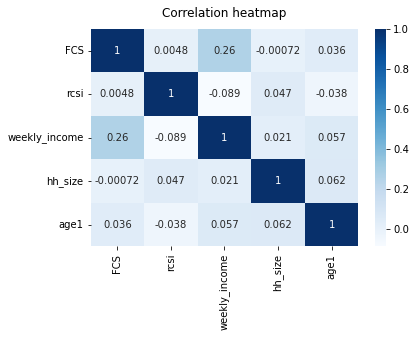

In [38]:
heatmap= sns.heatmap(refugee_df[['FCS','rcsi','weekly_income','hh_size', 'age1']].corr(),cmap = 'Blues', annot = True)  
heatmap.set_title('Correlation heatmap', pad =12)
plt.show()

In [40]:
FM = refugee_df[refugee_df['gender_HH_type'] == 'F&M']
mean_rcsi_FM = FM['rcsi'].mean()
mean_rcsi_FM

12.187301587301587